# Analyse des données et Machine learning pour la prédiction de la tuberculose pleurale
### Resumé
Modèles d’apprentissage automatique pour le diagnostic de la tuberculose pleurale
Pefura-Yone Eric Walter1,2,*, Ekongolo Marie-Christine3, Bane Jodie1, Djenabou Amadou2, Poka-Mayap Virginie2, Balkissou Adamou Dodo4, Ama Moor Vicky1


1Faculté de Médecine et des Sciences Biomédicales, Université de Yaoundé I, Yaoundé, Cameroun
2Hôpital Jamot de Yaoundé, Yaoundé, Cameroun
3Limbé Régional Hospital, Limbé, Cameroon
4Faculté de Médecine et des Sciences Biomédicales, Université de Garoua, Garoua, Cameroun
*Auteur correspondant: Pefura-Yone Eric Walter,  Faculté de Médecine et des Sciences Biomédicales, Université de Yaoundé I, Yaoundé, Cameroun
Email : pefurayone@gmail.com


Résumé


Introduction : Les méthodes d’intelligence artificielle et d’apprentissage automatique sont de plus en plus utilisées en médecine.  Très peu de modèles d’apprentissage automatique permettant de prédire le diagnostic des formes extra-pulmonaires de tuberculose (TB) sont disponibles. L'objectif de cette étude était de développer et valider les modèles d’apprentissage automatique permettant de prédire le diagnostic de la TB pleurale. 


Méthodes: Les données des patients suivis à l’Hôpital Jamot de Yaoundé et à la Clinique Polymère de Yaoundé de mai 2018 à juin 2020 (26 mois) pour épanchement pleural liquidien non purulent exsudatif ont été utilisées. Les algorithmes d’apprentissage automatique testés et incluaient les algorithmes d’ensemble d’arbre de décision, la régression logistique, l’algorithme des plus proches voisins, l’algorithme de classification naïve bayésienne et le réseau de neurones artificiels. Le score F1 moyen sur les deux catégories de la présence de la TB ou non, a été utilisé comme principal critère de sélection des meilleurs modèles. 


Résultats: Des 240 patients inclus, 139 (57,9 %) étaient de sexe masculin et leur âge médian (25ème -75ème percentiles) était de 46 (33-58) ans. Au total, 161 (67,1%) participants avaient la TB pleurale et 79 (32,9%) avaient une autre cause de la pleurésie exsudative non purulente. Les variables significativement associées à la TB pleurale étaient l’âge, l’infection à VIH, l’indice de masse corporelle, les antécédents de cancer, le taux de protéines pleural,  le taux de lactico-déshydrogenase (LDH) pleural et le taux de protéine C-réactive (CRP) pleural. Parmi les algorithmes d’apprentissage automatique testés, la régression logistique et le réseau de neurones artificiels étaient les plus performants avec respectivement un score F1 moyen de 0,85 et 0,84 (correspondant à une sensibilité de 91% pour les deux algorithmes). 


Conclusion: Les méthodes d’apprentissage automatique notamment le réseau de neurones artificiels et la régression logistique peuvent aider à améliorer le diagnostic de la TB pleurale. 


## Data preprocessing

In [1]:
# Import packages for data manipulation
import pandas as pd # data manipulation 
import numpy as np # scientific manipulation

In [2]:
# Import data 
data = pd.read_csv("C:/Users/DDD/Documents/ARTICLES_THESES_RECONSTITUTION/Mémoire_Ekongolo/pleuresie_ML.csv")

In [3]:
data.head(4)

,age,HIV,history_cancer,pleural_proteins,pleural_LDH,pleural_CRP,BMI,pleural_TB
0,80,0,0,47.3,568,30.75,22.32,0
1,48,0,0,54.4,641,99.82,33.87,1
2,64,0,0,65.6,1546,57.13,18.84,1
3,69,0,0,49.1,2483,63.77,28.03,0


In [4]:
data.dtypes # Should be corrected for some variables

age                   int64
HIV                   int64
history_cancer        int64
pleural_proteins    float64
pleural_LDH           int64
pleural_CRP         float64
BMI                 float64
pleural_TB            int64
dtype: object

In [5]:
# Correction of dtypes
data[['HIV','history_cancer']] = data[['HIV','history_cancer']].astype('category')
data.dtypes

age                    int64
HIV                 category
history_cancer      category
pleural_proteins     float64
pleural_LDH            int64
pleural_CRP          float64
BMI                  float64
pleural_TB             int64
dtype: object

In [6]:
from sklearn.model_selection import train_test_split  # used to split data as training and test sets
# Select predictors (X) and label (y)
# test set will be left out and only will be used for the final evaluation
y = data['pleural_TB']
X = data.drop(columns =['pleural_TB'])
# We will keep 20% (test size) of data in test set , and will also keeping proportion of label (stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0 )

In [7]:
print("X_train SHAPE:", X_train.shape), print("y_train SHAPE:", y_train.shape),
print("X_test SHAPE:", X_test.shape), print("y_test SHAPE:", y_test.shape)

X_train SHAPE: (192, 7)
y_train SHAPE: (192,)
X_test SHAPE: (48, 7)
y_test SHAPE: (48,)


(None, None)

In [8]:
X_test

,age,HIV,history_cancer,pleural_proteins,pleural_LDH,pleural_CRP,BMI
197,67,0,0,51.4,540,6.28,22.58
214,45,0,0,31.9,974,51.77,19.47
138,81,0,0,47.0,542,40.75,22.15
169,30,1,0,53.8,1002,89.20,19.38
132,72,0,0,31.4,533,39.29,21.26
...,...,...,...,...,...,...,...
1,48,0,0,54.4,641,99.82,33.87
119,71,0,0,37.0,343,30.00,20.66
141,25,0,0,41.0,589,69.70,22.72
165,42,0,0,57.1,3373,37.56,19.26


In [9]:
# target analysis
y_train.value_counts()

1    129
0     63
Name: pleural_TB, dtype: int64

In [10]:
y_train.value_counts()/y_train.shape[0]

1    0.671875
0    0.328125
Name: pleural_TB, dtype: float64

In [11]:
numerical_features = ['age', 'pleural_proteins', 'pleural_LDH','pleural_CRP','BMI']
categorical_features = ['HIV','history_cancer']

# On doit encoder les variables qualitatives en numérique[oui/non en 1/0] et pour certains algorithmes il 
# est nécessaire de normaliser les données
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer


# On crée une chaine de transformation appeler pipeline pour éxécuter un ensemble de consignes au même moment
# Avec les 2 modèles choisis nous n'avons pas besoin de standardiser ou normaliser les données
from sklearn.pipeline import make_pipeline

# Construire les pipelines qui vont permettre de faire les transformations succèssives de chaque type de variables
from sklearn.compose import make_column_transformer

numerical_pipeline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features))


In [68]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("X_train_scaled:\n", pd.DataFrame(X_train_scaled).head())
print("X_test_scaled:\n", pd.DataFrame(X_test_scaled).head())


X_train_scaled:
           0         1         2         3         4    5    6    7    8
0  0.483516 -0.465050  0.052444  0.486124 -0.224247  1.0  0.0  1.0  0.0
1 -0.615385 -0.139800  0.347556 -0.897225 -0.361598  1.0  0.0  1.0  0.0
2  0.395604  0.151213 -0.274667 -0.342177  2.413455  1.0  0.0  1.0  0.0
3 -0.483516  1.075606  2.121778  0.209515 -0.086896  1.0  0.0  1.0  0.0
4 -0.659341 -0.425107 -0.646222 -1.023178  0.526980  0.0  1.0  1.0  0.0
X_test_scaled:
           0         1         2         3         4    5    6    7    8
0  1.054945  0.356633 -0.324444 -1.088442  0.412053  1.0  0.0  1.0  0.0
1  0.087912 -0.756063  0.447111  0.298872 -0.459706  1.0  0.0  1.0  0.0
2  1.670330  0.105563 -0.320889 -0.037206  0.291521  1.0  0.0  1.0  0.0
3 -0.571429  0.493581  0.496889  1.440378 -0.484933  0.0  1.0  1.0  0.0
4  1.274725 -0.784593 -0.336889 -0.081732  0.042046  1.0  0.0  1.0  0.0


In [69]:
X_train_scaled.shape

(192, 9)

## Metrics and Procedures of evaluation

In [12]:
# Define evaluation procedures 
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
from imblearn.metrics import specificity_score

def evaluation_test_scaled(model):

    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)
    
    model_probs = model.predict_proba(X_test_scaled)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

def evaluation_test_original(model):

    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

    
def evaluation_test_pipeline(model):
    model_1= model.steps[1][1]
    model_1.fit(X_train, y_train)
    ypred = model_1.predict(X_test)
    
    model_1_probs = model_1.predict_proba(X_test)
    model_1_probs = model_1_probs[:, 1]
    model_1_auc = roc_auc_score(y_test, model_1_probs)
    spe = specificity_score(y_test, ypred, average=None)
    
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_1_auc)

In [13]:
# Packages for models training
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

## Hyperparameters turning using randomized search CV

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [16]:
from sklearn.neural_network import MLPClassifier
MLP_pipeline = make_pipeline(preprocessor, MLPClassifier(max_iter=2000, random_state=1))

distributions = dict(hidden_layer_sizes=np.arange(1,500),
                     activation=['identity', 'tanh','logistic','relu'])
clf_MLP_pipeline = RandomizedSearchCV(MLP_pipeline.steps[1][1], distributions, random_state=0,scoring = 'f1')
search = clf_MLP_pipeline.fit(X_train, y_train)
search.best_params_

{'hidden_layer_sizes': 157, 'activation': 'relu'}

In [15]:
# For Ridge Classifier with pipeline
RiC_pipeline = make_pipeline(preprocessor, RidgeClassifier(random_state=1))

distributions = dict(alpha=np.arange(1,20))
clf_RiC_pipeline = RandomizedSearchCV(RiC_pipeline.steps[1][1], distributions, random_state=0,scoring = 'f1')
search = clf_RiC_pipeline.fit(X_train_scaled, y_train)
search.best_params_

{'alpha': 2}

In [23]:
# For Logistic regression with pipeline
LR_pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,random_state=1))

distributions = dict(C=np.arange(1,10),
                     penalty=['l2', 'l1'])
clf_LR_pipeline = RandomizedSearchCV(LR_pipeline.steps[1][1], distributions, random_state=0,scoring = 'f1')
search = clf_LR_pipeline.fit(X_train, y_train)
search.best_params_

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: S

{'penalty': 'l2', 'C': 6}

In [24]:
# For Random Forest with pipeline
RF_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_RF_pipeline = RandomizedSearchCV(RF_pipeline.steps[1][1], distributions, random_state=0, scoring = 'f1')
search = clf_RF_pipeline.fit(X_train, y_train)
search.best_params_

{'n_estimators': 507, 'max_depth': 5}

In [25]:
# For Gradient boosting with pipeline
GBC_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_GBC_pipeline = RandomizedSearchCV(GBC_pipeline.steps[1][1], distributions, random_state=0, scoring = 'f1')
search = clf_GBC_pipeline.fit(X_train, y_train)
search.best_params_

{'n_estimators': 92, 'max_depth': 6}

In [26]:
# For Gradient boosting with pipeline
KNN_pipeline = make_pipeline(preprocessor, KNeighborsClassifier())
distributions = dict(n_neighbors=np.arange(1,10))
clf_KNN_pipeline = RandomizedSearchCV(KNN_pipeline.steps[1][1], distributions, random_state=0, scoring = 'f1')
search = clf_KNN_pipeline.fit(X_train, y_train)
search.best_params_

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 7}

## Hyperparameters turning with scaled (without pipeline)

In [26]:
# For Ridge Classifier
RiC = RidgeClassifier(random_state=1)

distributions = dict(alpha=np.arange(1,20))
clf_RiC = RandomizedSearchCV(RiC, distributions, random_state=0,scoring = 'f1')
search = clf_RiC.fit(X_train_scaled, y_train)
search.best_params_

<IPython.core.display.Javascript object>

{'alpha': 2}

In [110]:
# For Logistic regression
LR = LogisticRegression(max_iter=1000,random_state=1)

distributions = dict(C=np.arange(1,10),
                     penalty=['l2', 'l1'])
clf_LR = RandomizedSearchCV(LR, distributions, random_state=0,scoring = 'f1')
search = clf_LR.fit(X_train_scaled, y_train)
search.best_params_

<IPython.core.display.Javascript object>

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: S

{'penalty': 'l2', 'C': 6}

In [15]:
# For Random Forest
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_RF = RandomizedSearchCV(RandomForestClassifier(random_state=1), distributions, random_state=0, scoring = 'f1')
search = clf_RF.fit(X_train_scaled, y_train)
search.best_params_

{'n_estimators': 93, 'max_depth': 4}

In [16]:
# For Gradient boosting 
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_GBC = RandomizedSearchCV(GradientBoostingClassifier(random_state=1), distributions, random_state=0, scoring = 'f1')
search = clf_GBC.fit(X_train_scaled, y_train)
search.best_params_

{'n_estimators': 499, 'max_depth': 5}

In [17]:
# For K Neighbors classifier
distributions = dict(n_neighbors=np.arange(1,10),
                   )
clf_KNN = RandomizedSearchCV(KNeighborsClassifier(), distributions, random_state=0, scoring = 'f1')
search = clf_KNN.fit(X_train_scaled, y_train)
search.best_params_

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 5}

## Cross-validation with pipeline 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [17]:
# Ridge Classifier CV
RiC_pipeline = make_pipeline(preprocessor, RidgeClassifier(alpha=2, random_state=1))

cross_validation =10
score_f1 = cross_val_score(RiC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(RiC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.82758621 0.88888889 0.88       0.89655172 0.92857143 0.88888889
 0.78571429 0.86666667 0.74074074 0.74074074]
Mean CV F1 0.844
standard deviation CV F1 0.064
####################################################################
score folds AUC
[0.86813187 0.94505495 0.85714286 0.80769231 0.93589744 0.78205128
 0.78205128 0.87179487 0.69230769 0.75641026]
Mean CV AUC 0.830
standard deviation CV AUC 0.076


In [17]:
MLP_pipeline = make_pipeline(preprocessor, MLPClassifier(max_iter=1000,hidden_layer_sizes=157,
                                                         activation= 'relu', random_state=1))
cross_validation =10
score_f1 = cross_val_score(MLP_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(MLP_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.84615385 0.92307692 0.75       0.81481481 0.84615385 0.78571429
 0.78571429 0.83333333 0.81481481 0.76923077]
Mean CV F1 0.817
standard deviation CV F1 0.047
####################################################################
score folds AUC
[0.84615385 0.9010989  0.76190476 0.73076923 0.87179487 0.61538462
 0.64102564 0.8974359  0.73076923 0.80769231]
Mean CV AUC 0.780
standard deviation CV AUC 0.097


In [126]:
MLP_pipeline_2 = make_pipeline(preprocessor, MLPClassifier(max_iter=2000, random_state=1))
cross_validation =10
score_f1 = cross_val_score(MLP_pipeline_2.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(MLP_pipeline_2.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.81481481 0.74074074 0.8        0.75       0.88888889 0.82758621
 0.82758621 0.8125     0.72       0.74074074]
Mean CV F1 0.792
standard deviation CV F1 0.050
####################################################################
score folds AUC
[0.84615385 0.76923077 0.77380952 0.79487179 0.87179487 0.65384615
 0.57692308 0.87179487 0.65384615 0.79487179]
Mean CV AUC 0.761
standard deviation CV AUC 0.095


In [18]:
# Logistic regression Classifier CV
LR_pipeline = make_pipeline(preprocessor, LogisticRegression(C=6, penalty ="l2",max_iter=1000, random_state=1))

cross_validation =10
score_f1 = cross_val_score(LR_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(LR_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.82758621 0.88       0.88       0.89655172 0.92857143 0.85714286
 0.78571429 0.89655172 0.76923077 0.74074074]
Mean CV F1 0.846
standard deviation CV F1 0.059
####################################################################
score folds AUC
[0.83516484 0.94505495 0.8452381  0.79487179 0.93589744 0.78205128
 0.71794872 0.83333333 0.75641026 0.73076923]
Mean CV AUC 0.818
standard deviation CV AUC 0.074


In [19]:
# Random Forest CV
RF_pipeline = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=507,max_depth=5, random_state=1))

cross_validation =10
score_f1 = cross_val_score(RF_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(RF_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.89655172 0.86666667 0.83333333 0.82758621 0.88888889 0.89655172
 0.81481481 0.86666667 0.76923077 0.71428571]
Mean CV F1 0.837
standard deviation CV F1 0.056
####################################################################
score folds AUC
[0.87912088 0.97802198 0.78571429 0.75641026 0.8974359  0.79487179
 0.85897436 0.83333333 0.70512821 0.71794872]
Mean CV AUC 0.821
standard deviation CV AUC 0.081


In [31]:
# Gradient boosting CV
GBC_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(n_estimators=92,max_depth=6, random_state=1))

cross_validation =10
score_f1 = cross_val_score(GBC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(GBC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.75       0.76923077 0.88       0.8        0.88888889 0.85714286
 0.81481481 0.82758621 0.81481481 0.84615385]
Mean CV F1 0.825
standard deviation CV F1 0.043
####################################################################
score folds AUC
[0.84615385 0.84615385 0.75       0.73076923 0.82051282 0.71794872
 0.83333333 0.80769231 0.69230769 0.67948718]
Mean CV AUC 0.772
standard deviation CV AUC 0.062


In [21]:
# SVM CV
SVM_pipeline = make_pipeline(preprocessor, svm.NuSVC(gamma="auto", probability=True))

cross_validation =10
score_f1 = cross_val_score(SVM_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(SVM_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.78787879 0.78787879 0.77419355 0.8125     0.8125     0.8125
 0.8125     0.8125     0.8125     0.8125    ]
Mean CV F1 0.804
standard deviation CV F1 0.014
####################################################################
score folds AUC
[0.6043956  0.46153846 0.60119048 0.5        0.5        0.48717949
 0.53846154 0.52564103 0.61538462 0.35897436]
Mean CV AUC 0.519
standard deviation CV AUC 0.074


In [20]:
# KNN CV
KNN_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=7))

cross_validation =10
score_f1 = cross_val_score(KNN_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(KNN_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.85714286 0.82758621 0.84615385 0.75862069 0.74074074 0.77419355
 0.75862069 0.66666667 0.81481481 0.8       ]
Mean CV F1 0.784
standard deviation CV F1 0.054
####################################################################
score folds AUC
[0.8021978  0.67582418 0.79761905 0.56410256 0.55769231 0.52564103
 0.59615385 0.50641026 0.68589744 0.78205128]
Mean CV AUC 0.649
standard deviation CV AUC 0.109


In [22]:
# Gaussian naive CV
GNB_pipeline = make_pipeline(preprocessor, GaussianNB())

cross_validation =10
score_f1 = cross_val_score(GNB_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(GNB_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.75862069 0.89655172 0.84615385 0.83870968 0.86666667 0.86666667
 0.78571429 0.86666667 0.82758621 0.74074074]
Mean CV F1 0.829
standard deviation CV F1 0.049
####################################################################
score folds AUC
[0.71428571 0.92307692 0.85714286 0.74358974 0.91025641 0.78205128
 0.56410256 0.82051282 0.73076923 0.74358974]
Mean CV AUC 0.779
standard deviation CV AUC 0.101


In [25]:
# For stack model
print('Stack model MLPC')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('MLPC', MLPClassifier(max_iter=1000,hidden_layer_sizes=157,
                                                         activation= 'relu', random_state=1)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack_MLPC= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=5, random_state=1)
)
clf_stack_MLPC_pipeline = make_pipeline(preprocessor,clf_stack_MLPC)

cross_validation =10
score_f1 = cross_val_score(clf_stack_MLPC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_MLPC_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model MLPC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

score folds F1
[0.82758621 0.84615385 0.76923077 0.81481481 0.81481481 0.89655172
 0.75862069 0.76923077 0.86666667 0.8       ]
Mean CV F1 0.816
standard deviation CV F1 0.042
####################################################################
score folds AUC
[0.74725275 0.93406593 0.78571429 0.70512821 0.79487179 0.75641026
 0.76923077 0.75641026 0.93589744 0.75641026]
Mean CV AUC 0.794
standard deviation CV AUC 0.074


In [46]:
# For stack model
print('Stack model')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=5, random_state=1)
)
clf_stack_pipeline = make_pipeline(preprocessor,clf_stack)

cross_validation =10
score_f1 = cross_val_score(clf_stack_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model
score folds F1
[0.63157895 0.88888889 0.78571429 0.82758621 0.88888889 0.88888889
 0.78571429 0.78571429 0.8        0.82758621]
Mean CV F1 0.811
standard deviation CV F1 0.073
####################################################################
score folds AUC
[0.8021978  0.87912088 0.80357143 0.76923077 0.88461538 0.68589744
 0.70512821 0.82051282 0.8974359  0.80769231]
Mean CV AUC 0.806
standard deviation CV AUC 0.068


In [173]:
# For stack model
print('Stack model_2')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('RiC',  RidgeClassifier(alpha=2, random_state=1)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack_2= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)
)
clf_stack_2_pipeline = make_pipeline(preprocessor,clf_stack_2)

cross_validation =10
score_f1 = cross_val_score(clf_stack_2_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_2_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model_2
score folds F1
[0.82758621 0.84615385 0.8        0.78571429 0.81481481 0.82758621
 0.78571429 0.86666667 0.82758621 0.78571429]
Mean CV F1 0.817
standard deviation CV F1 0.026
####################################################################
score folds AUC
[0.8021978  0.86813187 0.83928571 0.71794872 0.8974359  0.71794872
 0.73076923 0.75641026 0.71794872 0.74358974]
Mean CV AUC 0.779
standard deviation CV AUC 0.064


In [110]:
# For stack model
print('Stack model 3')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('MLP',MLPClassifier(max_iter=1000,hidden_layer_sizes=157,
                                                         activation= 'relu', random_state=1) ),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack_3= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)
)
clf_stack_3_pipeline = make_pipeline(preprocessor,clf_stack_3)

cross_validation =10
score_f1 = cross_val_score(clf_stack_3_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_3_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model 3
score folds F1
[0.82758621 0.84615385 0.72       0.78571429 0.81481481 0.85714286
 0.75862069 0.66666667 0.89655172 0.8       ]
Mean CV F1 0.797
standard deviation CV F1 0.065
####################################################################
score folds AUC
[0.78021978 0.9010989  0.78571429 0.64102564 0.78205128 0.69230769
 0.76923077 0.69230769 0.88461538 0.74358974]
Mean CV AUC 0.767
standard deviation CV AUC 0.078


In [52]:
# For stack model
print('Stack model_4')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('KNN',  KNeighborsClassifier(n_neighbors=7))
]
clf_stack_4= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)
)
clf_stack_4_pipeline = make_pipeline(preprocessor,clf_stack_4)

cross_validation =10
score_f1 = cross_val_score(clf_stack_4_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_4_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model_4
score folds F1
[0.85714286 0.8        0.83333333 0.8        0.89655172 0.8
 0.74074074 0.66666667 0.86666667 0.75862069]
Mean CV F1 0.802
standard deviation CV F1 0.064
####################################################################
score folds AUC
[0.79120879 0.86813187 0.85119048 0.74358974 0.85897436 0.6474359
 0.65384615 0.64102564 0.62820513 0.69230769]
Mean CV AUC 0.738
standard deviation CV AUC 0.093


In [195]:
# For stack model
print('Stack model 5')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('RiC', RidgeClassifier(alpha=2, random_state=1)),
    ('GNB', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack_5= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)
)
clf_stack_5_pipeline = make_pipeline(preprocessor,clf_stack_5)

cross_validation =10
score_f1 = cross_val_score(clf_stack_5_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_5_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model 5
score folds F1
[0.85714286 0.84615385 0.83333333 0.75862069 0.88888889 0.86666667
 0.75862069 0.82758621 0.8        0.78571429]
Mean CV F1 0.822
standard deviation CV F1 0.043
####################################################################
score folds AUC
[0.82417582 0.89010989 0.83333333 0.67948718 0.92307692 0.69230769
 0.69230769 0.69230769 0.78205128 0.74358974]
Mean CV AUC 0.775
standard deviation CV AUC 0.085


In [189]:
# For stack model
print('Stack model 6')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('Random Forest', RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)),
    ('GNB', GaussianNB()),
    ('RiC', RidgeClassifier(alpha=2, random_state=1))
]
clf_stack_6= StackingClassifier(estimators=estimators, final_estimator= KNeighborsClassifier(n_neighbors=5)
)
clf_stack_6_pipeline = make_pipeline(preprocessor,clf_stack_6)

cross_validation =10
score_f1 = cross_val_score(clf_stack_6_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_6_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model 6
score folds F1
[0.8        0.76923077 0.88888889 0.78571429 0.89655172 0.83870968
 0.71428571 0.8        0.74074074 0.74074074]
Mean CV F1 0.797
standard deviation CV F1 0.058
####################################################################
score folds AUC
[0.7967033  0.83516484 0.78571429 0.72435897 0.92948718 0.69871795
 0.59615385 0.57692308 0.57692308 0.73076923]
Mean CV AUC 0.725
standard deviation CV AUC 0.111


In [197]:
# For stack model
print('Stack model 7')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('Random Forest', RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)),
    ('GNB', GaussianNB()),
    ('RiC', RidgeClassifier(alpha=2, random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True))
]
clf_stack_7= StackingClassifier(estimators=estimators, final_estimator= KNeighborsClassifier(n_neighbors=5)
)
clf_stack_7_pipeline = make_pipeline(preprocessor,clf_stack_7)

cross_validation =10
score_f1 = cross_val_score(clf_stack_6_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_6_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model 7
score folds F1
[0.8        0.76923077 0.88888889 0.78571429 0.89655172 0.83870968
 0.71428571 0.8        0.74074074 0.74074074]
Mean CV F1 0.797
standard deviation CV F1 0.058
####################################################################
score folds AUC
[0.7967033  0.83516484 0.78571429 0.72435897 0.92948718 0.69871795
 0.59615385 0.57692308 0.57692308 0.73076923]
Mean CV AUC 0.725
standard deviation CV AUC 0.111


In [50]:
# For stack model
print('Stack model 8')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', max_iter=1000, random_state=1)),
    ('GNB', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack_8= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=507,max_depth=7, random_state=1)
)
clf_stack_8_pipeline = make_pipeline(preprocessor,clf_stack_8)

cross_validation =10
score_f1 = cross_val_score(clf_stack_8_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack_8_pipeline.steps[1][1], X_train, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model 8
score folds F1
[0.85714286 0.84615385 0.83333333 0.75862069 0.88888889 0.86666667
 0.75862069 0.82758621 0.8        0.78571429]
Mean CV F1 0.822
standard deviation CV F1 0.043
####################################################################
score folds AUC
[0.82417582 0.89010989 0.83333333 0.67948718 0.92307692 0.69230769
 0.69230769 0.69230769 0.78205128 0.74358974]
Mean CV AUC 0.775
standard deviation CV AUC 0.085


In [ ]:
# A completer avec les modèles de pipeline
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
# Learning curve of Ridge Classifier

N, train_score, val_score = learning_curve(RidgeClassifier(alpha= 2, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Ridge classifier')


plt.subplot(2,2,2)
# Learning curve of Logistic regression
N, train_score, val_score = learning_curve(LogisticRegression(C= 6, penalty=  'l2', random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Logistic regression')


plt.subplot(2,2,3)
# Learning curve for Random Forest

N, train_score, val_score = learning_curve(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Random Forest')


plt.subplot(2,2,4)

# Learning curve for Gradient boosting 

N, train_score, val_score = learning_curve(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Gradient boosting')

plt.savefig("learning curve block 1.png")

plt.show()


In [26]:
evaluation_test_pipeline(clf_stack_MLPC_pipeline)

CONFUSION MATRIX
[[ 5 11]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.74      0.97      0.84        32

    accuracy                           0.75        48
   macro avg       0.79      0.64      0.65        48
weighted avg       0.77      0.75      0.71        48

SPECIFICITY
[0.96875 0.3125 ]
AUROC
0.716796875


In [124]:
evaluation_test_pipeline(make_pipeline(preprocessor, MLPClassifier(random_state=1)))

CONFUSION MATRIX
[[11  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.84      0.84      0.84        32

    accuracy                           0.79        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.79      0.79      0.79        48

SPECIFICITY
[0.84375 0.6875 ]
AUROC
0.775390625


In [123]:
# MLP ussing best params
evaluation_test_pipeline(MLP_pipeline)

CONFUSION MATRIX
[[ 8  8]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.78      0.91      0.84        32

    accuracy                           0.77        48
   macro avg       0.76      0.70      0.72        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.90625 0.5    ]
AUROC
0.732421875


In [153]:
evaluation_test_pipeline_RiC(RiC_pipeline)

CONFUSION MATRIX
[[ 9  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.81      0.94      0.87        32

    accuracy                           0.81        48
   macro avg       0.81      0.75      0.77        48
weighted avg       0.81      0.81      0.80        48



In [38]:
evaluation_test_pipeline(LR_pipeline)

CONFUSION MATRIX
[[ 9  7]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.81      0.91      0.85        32

    accuracy                           0.79        48
   macro avg       0.78      0.73      0.75        48
weighted avg       0.79      0.79      0.78        48

SPECIFICITY
[0.90625 0.5625 ]
AUROC
0.73046875


In [39]:
evaluation_test_pipeline(RF_pipeline)

CONFUSION MATRIX
[[ 8  8]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.78      0.88      0.82        32

    accuracy                           0.75        48
   macro avg       0.72      0.69      0.70        48
weighted avg       0.74      0.75      0.74        48

SPECIFICITY
[0.875 0.5  ]
AUROC
0.734375


In [40]:
evaluation_test_pipeline(GBC_pipeline)

CONFUSION MATRIX
[[ 6 10]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.72      0.81      0.76        32

    accuracy                           0.67        48
   macro avg       0.61      0.59      0.60        48
weighted avg       0.65      0.67      0.65        48

SPECIFICITY
[0.8125 0.375 ]
AUROC
0.65234375


In [41]:
evaluation_test_pipeline(SVM_pipeline)

CONFUSION MATRIX
[[ 0 16]
 [ 0 32]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.67      1.00      0.80        32

    accuracy                           0.67        48
   macro avg       0.33      0.50      0.40        48
weighted avg       0.44      0.67      0.53        48

SPECIFICITY
[1. 0.]
AUROC
0.498046875


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
evaluation_test_pipeline(KNN_pipeline)

CONFUSION MATRIX
[[ 7  9]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        16
           1       0.75      0.84      0.79        32

    accuracy                           0.71        48
   macro avg       0.67      0.64      0.65        48
weighted avg       0.69      0.71      0.70        48

SPECIFICITY
[0.84375 0.4375 ]
AUROC
0.7587890625


In [43]:
evaluation_test_pipeline(GNB_pipeline)

CONFUSION MATRIX
[[ 6 10]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.76      1.00      0.86        32

    accuracy                           0.79        48
   macro avg       0.88      0.69      0.71        48
weighted avg       0.84      0.79      0.76        48

SPECIFICITY
[1.    0.375]
AUROC
0.765625


In [48]:
evaluation_test_pipeline(clf_stack_pipeline)

CONFUSION MATRIX
[[ 8  8]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.78      0.91      0.84        32

    accuracy                           0.77        48
   macro avg       0.76      0.70      0.72        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.90625 0.5    ]
AUROC
0.751953125


In [182]:
evaluation_test_pipeline(clf_stack_2_pipeline)

CONFUSION MATRIX
[[ 7  9]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.78      0.97      0.86        32

    accuracy                           0.79        48
   macro avg       0.82      0.70      0.72        48
weighted avg       0.81      0.79      0.77        48

SPECIFICITY
[0.96875 0.4375 ]
AUROC
0.7626953125


In [111]:
evaluation_test_pipeline(clf_stack_3_pipeline)

CONFUSION MATRIX
[[ 4 12]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        16
           1       0.71      0.94      0.81        32

    accuracy                           0.71        48
   macro avg       0.69      0.59      0.59        48
weighted avg       0.70      0.71      0.66        48

SPECIFICITY
[0.9375 0.25  ]
AUROC
0.6826171875


In [53]:
evaluation_test_pipeline(clf_stack_4_pipeline)

CONFUSION MATRIX
[[ 7  9]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.76      0.88      0.81        32

    accuracy                           0.73        48
   macro avg       0.70      0.66      0.67        48
weighted avg       0.72      0.73      0.71        48

SPECIFICITY
[0.875  0.4375]
AUROC
0.703125


In [196]:
evaluation_test_pipeline(clf_stack_5_pipeline)

CONFUSION MATRIX
[[ 6 10]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        16
           1       0.74      0.91      0.82        32

    accuracy                           0.73        48
   macro avg       0.71      0.64      0.65        48
weighted avg       0.72      0.73      0.70        48

SPECIFICITY
[0.90625 0.375  ]
AUROC
0.68359375


In [194]:
evaluation_test_pipeline_RiC(RiC_pipeline)

CONFUSION MATRIX
[[ 9  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.81      0.94      0.87        32

    accuracy                           0.81        48
   macro avg       0.81      0.75      0.77        48
weighted avg       0.81      0.81      0.80        48



In [190]:
evaluation_test_pipeline(clf_stack_6_pipeline)

CONFUSION MATRIX
[[ 5 11]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.70      0.81      0.75        32

    accuracy                           0.65        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.62      0.65      0.63        48

SPECIFICITY
[0.8125 0.3125]
AUROC
0.6181640625


In [198]:
evaluation_test_pipeline(clf_stack_7_pipeline)

CONFUSION MATRIX
[[ 5 11]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.45      0.31      0.37        16
           1       0.70      0.81      0.75        32

    accuracy                           0.65        48
   macro avg       0.58      0.56      0.56        48
weighted avg       0.62      0.65      0.63        48

SPECIFICITY
[0.8125 0.3125]
AUROC
0.6181640625


In [51]:
evaluation_test_pipeline(clf_stack_8_pipeline)

CONFUSION MATRIX
[[ 6 10]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.67      0.38      0.48        16
           1       0.74      0.91      0.82        32

    accuracy                           0.73        48
   macro avg       0.71      0.64      0.65        48
weighted avg       0.72      0.73      0.70        48

SPECIFICITY
[0.90625 0.375  ]
AUROC
0.68359375


## Cross-validation

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Ridge Classifier CV
cross_validation =10
score_f1 = cross_val_score(RidgeClassifier(alpha= 2, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(RidgeClassifier(alpha= 2, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.82758621 0.88888889 0.88       0.89655172 0.92857143 0.88888889
 0.78571429 0.86666667 0.74074074 0.74074074]
Mean CV F1 0.844
standard deviation CV F1 0.064
####################################################################
score folds AUC
[0.86813187 0.94505495 0.85714286 0.82051282 0.93589744 0.78205128
 0.78205128 0.87179487 0.69230769 0.75641026]
Mean CV AUC 0.831
standard deviation CV AUC 0.076


[ 17  34  51  68  86 103 120 137 154 172]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

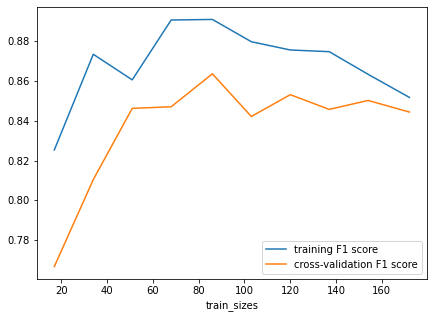

In [28]:
# Learning curve of Ridge Classifier

N, train_score, val_score = learning_curve(RidgeClassifier(alpha= 2, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Logistic Regression CV
cross_validation =10
score_f1 = cross_val_score(LogisticRegression(C= 6, penalty=  'l2', random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(LogisticRegression(C= 6, penalty=  'l2', random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.82758621 0.92307692 0.88       0.89655172 0.92857143 0.85714286
 0.78571429 0.89655172 0.76923077 0.74074074]
Mean CV F1 0.851
standard deviation CV F1 0.063
####################################################################
score folds AUC
[0.83516484 0.95604396 0.85714286 0.79487179 0.93589744 0.79487179
 0.73076923 0.83333333 0.75641026 0.71794872]
Mean CV AUC 0.821
standard deviation CV AUC 0.076


In [85]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

[ 17  34  51  68  86 103 120 137 154 172]


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


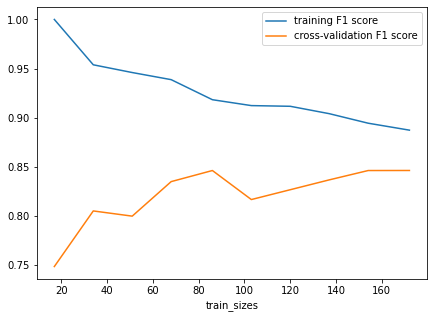

In [86]:
# Learning curve of MLP

N, train_score, val_score = learning_curve(MLPClassifier(hidden_layer_sizes=157, activation='relu', random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

[ 17  34  51  68  86 103 120 137 154 172]


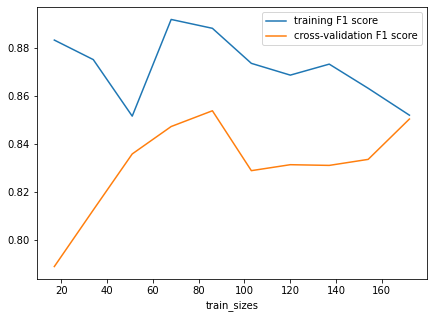

In [32]:
# Learning curve of Logistic regression

N, train_score, val_score = learning_curve(LogisticRegression(C= 6, penalty=  'l2', random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [25]:
# Random Forest CV
cross_validation =10
score_f1 = cross_val_score(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.89655172 0.86666667 0.88       0.82758621 0.96296296 0.89655172
 0.86666667 0.86666667 0.85714286 0.75862069]
Mean CV F1 0.868
standard deviation CV F1 0.050
####################################################################
score folds AUC
[0.87912088 0.95604396 0.80952381 0.74358974 0.92307692 0.78205128
 0.84615385 0.83333333 0.74358974 0.70512821]
Mean CV AUC 0.822
standard deviation CV AUC 0.077


[ 17  34  51  68  86 103 120 137 154 172]


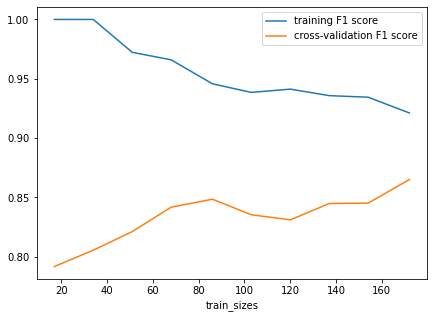

In [33]:
# Learning curve for Random Forest

N, train_score, val_score = learning_curve(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [26]:
# Gradient Boosting CV
cross_validation =10
score_f1 = cross_val_score(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.84615385 0.89655172 0.7826087  0.81481481 0.88       0.78571429
 0.84615385 0.86666667 0.74074074 0.75862069]
Mean CV F1 0.822
standard deviation CV F1 0.051
####################################################################
score folds AUC
[0.91208791 0.87912088 0.73809524 0.69230769 0.87179487 0.64102564
 0.8974359  0.76923077 0.61538462 0.6025641 ]
Mean CV AUC 0.762
standard deviation CV AUC 0.116


[ 17  34  51  68  86 103 120 137 154 172]


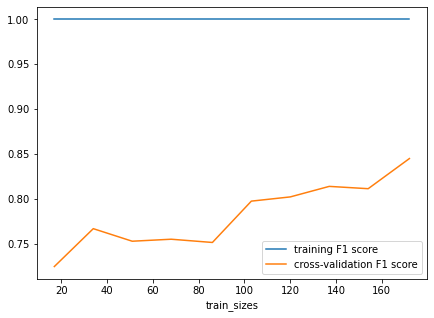

In [34]:
# Learning curve for Gradient boosting 

N, train_score, val_score = learning_curve(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [27]:
# For support vector machine
print('SUPPORT VECTOR MACHINE')
cross_validation =10
score_f1 = cross_val_score(svm.NuSVC(gamma="auto", probability=True), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(svm.NuSVC(gamma="auto", probability=True), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))


SUPPORT VECTOR MACHINE
score folds F1
[0.88888889 0.83333333 0.88       0.89655172 0.92857143 0.84615385
 0.81481481 0.86666667 0.76923077 0.69230769]
Mean CV F1 0.842
standard deviation CV F1 0.066
####################################################################
score folds AUC
[0.86813187 0.91208791 0.76190476 0.96153846 0.85897436 0.76923077
 0.75641026 0.80769231 0.74358974 0.6025641 ]
Mean CV AUC 0.804
standard deviation CV AUC 0.096


[ 17  34  51  68  86 103 120 137 154 172]


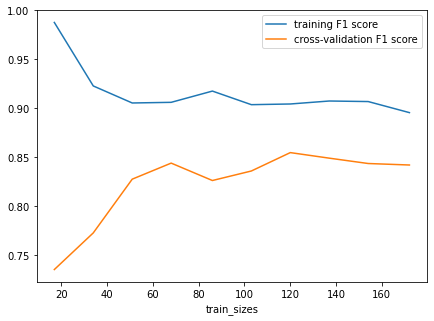

In [35]:
# Learning curve for SVM

N, train_score, val_score = learning_curve(svm.NuSVC(gamma="auto", probability=True), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [28]:
# KNeighbors CV
print('KNN')
cross_validation =10
score_f1 = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

KNN
score folds F1
[0.84615385 0.88888889 0.8        0.96296296 0.84615385 0.78571429
 0.78571429 0.82758621 0.76923077 0.74074074]
Mean CV F1 0.825
standard deviation CV F1 0.062
####################################################################
score folds AUC
[0.84615385 0.90659341 0.76785714 0.94230769 0.76282051 0.67948718
 0.73717949 0.65384615 0.66025641 0.63461538]
Mean CV AUC 0.759
standard deviation CV AUC 0.103


[ 17  34  51  68  86 103 120 137 154 172]


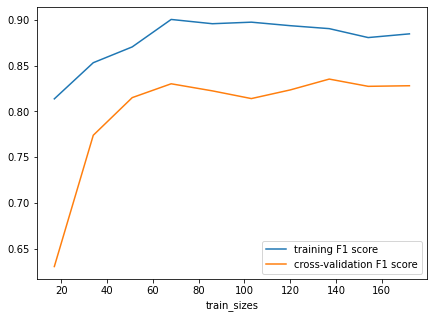

In [36]:
# Learning curve for KNN

N, train_score, val_score = learning_curve(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [29]:
# For Naive bayes
print('Naive Bayes')
cross_validation =10
score_f1 = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Naive Bayes
score folds F1
[0.8125     0.83870968 0.82758621 0.8125     0.83870968 0.83870968
 0.83870968 0.83870968 0.8125     0.8125    ]
Mean CV F1 0.827
standard deviation CV F1 0.012
####################################################################
score folds AUC
[0.62637363 0.87912088 0.89285714 0.80769231 0.93589744 0.76923077
 0.53846154 0.82051282 0.78205128 0.66666667]
Mean CV AUC 0.772
standard deviation CV AUC 0.120


[ 17  34  51  68  86 103 120 137 154 172]


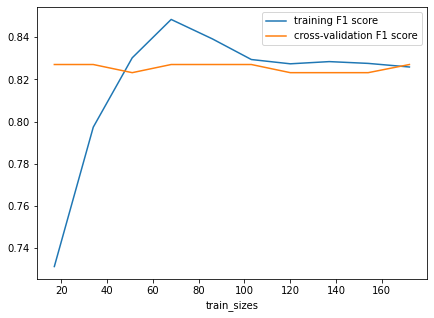

In [37]:
# Learning curve for Naive Bayes

N, train_score, val_score = learning_curve(GaussianNB(), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

In [29]:
# For stack model
print('Stack model')
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)

cross_validation =10
score_f1 = cross_val_score(clf_stack, X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack, X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

Stack model
score folds F1
[0.82758621 0.84615385 0.84615385 0.92307692 0.92857143 0.81481481
 0.78571429 0.83870968 0.76923077 0.74074074]
Mean CV F1 0.832
standard deviation CV F1 0.057
####################################################################
score folds AUC
[0.81318681 0.92307692 0.79761905 0.88461538 0.92307692 0.80769231
 0.87179487 0.78205128 0.74358974 0.71794872]
Mean CV AUC 0.826
standard deviation CV AUC 0.068


[ 17  34  51  68  86 103 120 137 154 172]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

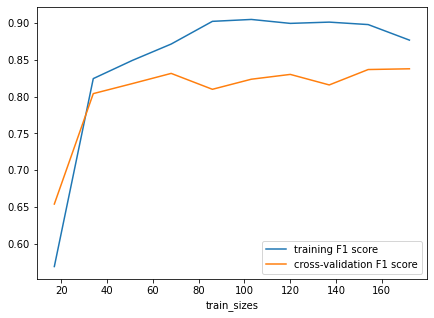

In [92]:
# Learning curve for Stack
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)

N, train_score, val_score = learning_curve(clf_stack, X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

print(N)
plt.figure(figsize=(7, 5))
plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train_sizes')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

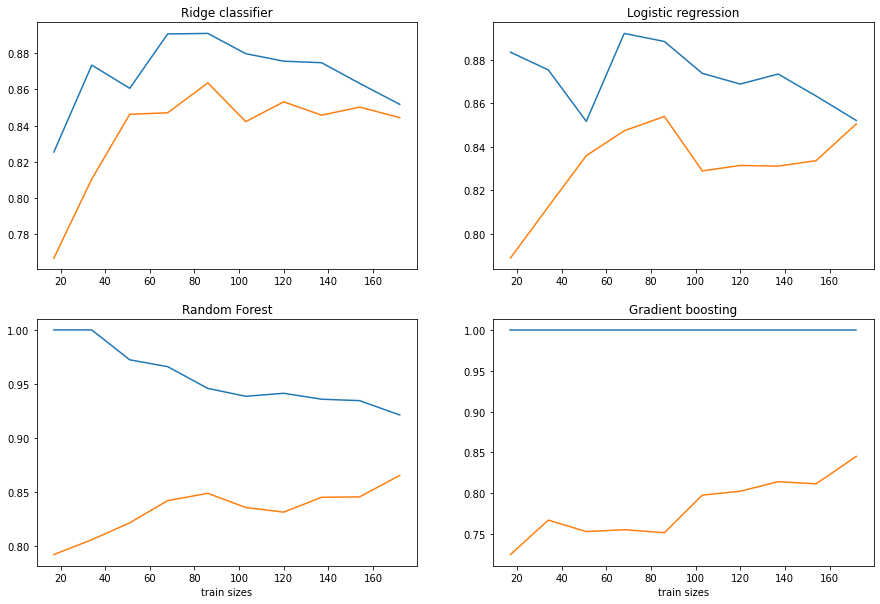

In [99]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
# Learning curve of Ridge Classifier

N, train_score, val_score = learning_curve(RidgeClassifier(alpha= 2, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Ridge classifier')


plt.subplot(2,2,2)
# Learning curve of Logistic regression
N, train_score, val_score = learning_curve(LogisticRegression(C= 6, penalty=  'l2', random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Logistic regression')


plt.subplot(2,2,3)
# Learning curve for Random Forest

N, train_score, val_score = learning_curve(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Random Forest')


plt.subplot(2,2,4)

# Learning curve for Gradient boosting 

N, train_score, val_score = learning_curve(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Gradient boosting')

plt.savefig("learning curve block 1.png")

plt.show()


## Validation curve with SKlearn preprocessor

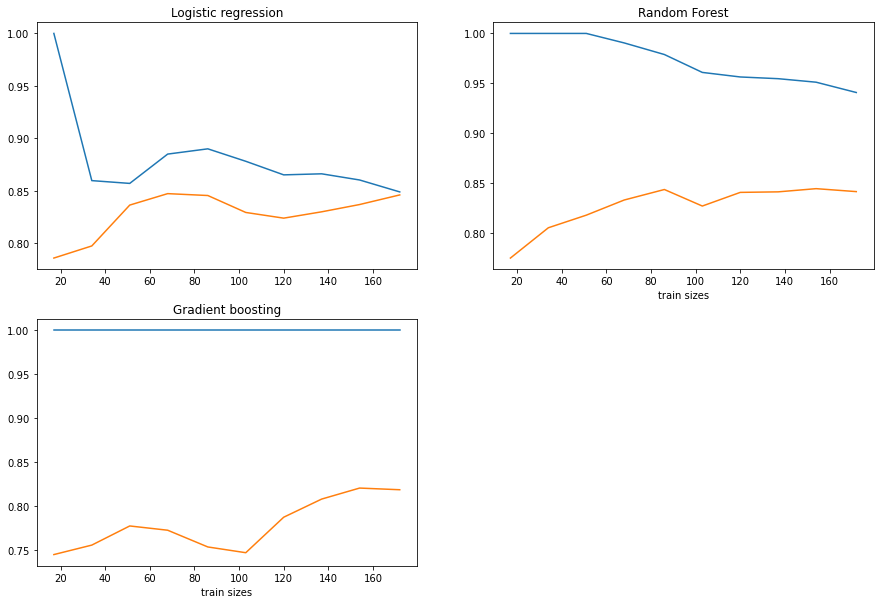

In [133]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
# Learning curve of Logistic regression
N, train_score, val_score = learning_curve(LR_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Logistic regression')


plt.subplot(2,2,2)
# Learning curve for Random Forest

N, train_score, val_score = learning_curve(RF_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Random Forest')


plt.subplot(2,2,3)

# Learning curve for Gradient boosting 

N, train_score, val_score = learning_curve(GBC_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Gradient boosting')

plt.savefig("learning curve block 1.png")

plt.show()


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


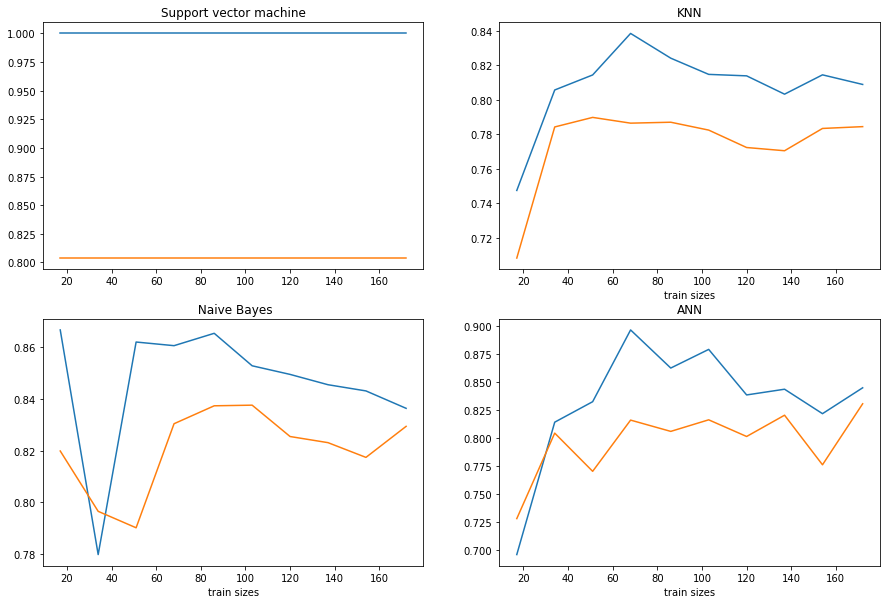

In [135]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
# Learning curve of SVM
N, train_score, val_score = learning_curve(SVM_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Support vector machine')


plt.subplot(2,2,2)
# Learning curve for KNN

N, train_score, val_score = learning_curve(KNN_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('KNN')


plt.subplot(2,2,3)

# Learning curve for Naive Bayes

N, train_score, val_score = learning_curve(GNB_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title(' Naive Bayes')

# Learning curve for MLP
plt.subplot(2,2,4)
N, train_score, val_score = learning_curve(MLP_pipeline.steps[1][1], X_train, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('ANN')

plt.savefig("learning curve block 2 original.png")

plt.show()

## END OF valiadation curve with SKlearn preprocessor 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

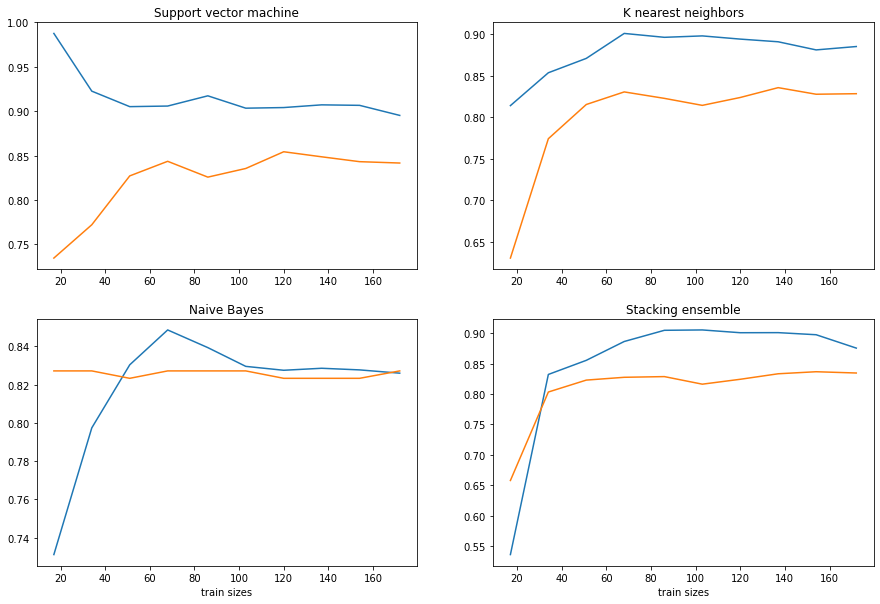

In [98]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
# Learning SVM
N, train_score, val_score = learning_curve(svm.NuSVC(gamma="auto", probability=True), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('Support vector machine')


plt.subplot(2,2,2)
# Learning curve of KNN
N, train_score, val_score = learning_curve(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('')
plt.title('K nearest neighbors')


plt.subplot(2,2,3)
# Learning curve for Naive Bayes

N, train_score, val_score = learning_curve(GaussianNB(), X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Naive Bayes')


plt.subplot(2,2,4)

# Learning curve for stack model 

N, train_score, val_score = learning_curve(clf_stack, X_train_scaled, y_train,  scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='training F1 score')
plt.plot(N, val_score.mean(axis=1), label='cross-validation F1 score')
plt.xlabel('train sizes')
plt.title('Stacking ensemble')

plt.savefig("learning curve block 2.png")
plt.show()

## Evaluation on test set

In [32]:
# Evaluation Ridge Classifier
def evaluation_test_scaled_RiC(model):

    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)
    
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
  
print('RIDGE CLASSIFIER')
evaluation_test_scaled_RiC(RidgeClassifier(alpha= 2, random_state=1))

RIDGE CLASSIFIER
CONFUSION MATRIX
[[ 9  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.81      0.94      0.87        32

    accuracy                           0.81        48
   macro avg       0.81      0.75      0.77        48
weighted avg       0.81      0.81      0.80        48



In [118]:
def evaluation_test_pipeline_RiC(model):
    model_1= model.steps[1][1]
    model_1.fit(X_train, y_train)
    ypred = model_1.predict(X_test)

    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    

evaluation_test_pipeline_RiC(RiC_pipeline)

CONFUSION MATRIX
[[ 9  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.81      0.94      0.87        32

    accuracy                           0.81        48
   macro avg       0.81      0.75      0.77        48
weighted avg       0.81      0.81      0.80        48



In [31]:
# Evaluation Logistric regression
print('LOGISTIC REGRESSION')
evaluation_test_scaled(LogisticRegression(C= 6, penalty=  'l2', random_state=1))

LOGISTIC REGRESSION
CONFUSION MATRIX
[[ 9  7]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.81      0.91      0.85        32

    accuracy                           0.79        48
   macro avg       0.78      0.73      0.75        48
weighted avg       0.79      0.79      0.78        48

SPECIFICITY
[0.90625 0.5625 ]
AUROC
0.736328125


In [117]:
evaluation_test_pipeline(LR_pipeline)

CONFUSION MATRIX
[[ 9  7]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.81      0.91      0.85        32

    accuracy                           0.79        48
   macro avg       0.78      0.73      0.75        48
weighted avg       0.79      0.79      0.78        48

SPECIFICITY
[0.90625 0.5625 ]
AUROC
0.7421875


In [32]:
# Evaluation Random Forest
print('Random Forest')
evaluation_test_scaled(RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1))


Random Forest
CONFUSION MATRIX
[[ 6 10]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.60      0.38      0.46        16
           1       0.74      0.88      0.80        32

    accuracy                           0.71        48
   macro avg       0.67      0.62      0.63        48
weighted avg       0.69      0.71      0.69        48

SPECIFICITY
[0.875 0.375]
AUROC
0.736328125


In [33]:
# Evaluation gradient boosting
print('GRADIENT BOOSTING')
evaluation_test_scaled(GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1))

GRADIENT BOOSTING
CONFUSION MATRIX
[[ 6 10]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.46      0.38      0.41        16
           1       0.71      0.78      0.75        32

    accuracy                           0.65        48
   macro avg       0.59      0.58      0.58        48
weighted avg       0.63      0.65      0.64        48

SPECIFICITY
[0.78125 0.375  ]
AUROC
0.693359375


In [34]:
# Evaluation support vector machine
print('SUPPORT VECTOR MACHINE')
evaluation_test_scaled(svm.NuSVC(gamma="auto", probability=True))

SUPPORT VECTOR MACHINE
CONFUSION MATRIX
[[ 8  8]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.76      0.81      0.79        32

    accuracy                           0.71        48
   macro avg       0.67      0.66      0.66        48
weighted avg       0.70      0.71      0.70        48

SPECIFICITY
[0.8125 0.5   ]
AUROC
0.794921875


In [35]:
# Evaluation KNN
print('KNN')
evaluation_test_scaled(KNeighborsClassifier(n_neighbors=5))

KNN
CONFUSION MATRIX
[[ 8  8]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.62        16
           1       0.79      0.94      0.86        32

    accuracy                           0.79        48
   macro avg       0.79      0.72      0.74        48
weighted avg       0.79      0.79      0.78        48

SPECIFICITY
[0.9375 0.5   ]
AUROC
0.73828125


In [36]:
# Evaluation Naive Bayes
print('NAIVE BAYES')
evaluation_test_scaled(GaussianNB())

NAIVE BAYES
CONFUSION MATRIX
[[ 1 15]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.68      1.00      0.81        32

    accuracy                           0.69        48
   macro avg       0.84      0.53      0.46        48
weighted avg       0.79      0.69      0.58        48

SPECIFICITY
[1.     0.0625]
AUROC
0.787109375


## Stacking

In [40]:
# Seems to be the most efficicient stack model
from sklearn.ensemble import StackingClassifier
estimators = [
 
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('RiC', RidgeClassifier(alpha=2))
]
clf_stack_RiC= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)
clf_stack_RiC

StackingClassifier(estimators=[('SVM', NuSVC(gamma='auto', probability=True)),
                               ('KNN', KNeighborsClassifier()),
                               ('RiC', RidgeClassifier(alpha=2))],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          n_estimators=93,
                                                          random_state=1))

In [41]:
evaluation_test_scaled(clf_stack_RiC)

CONFUSION MATRIX
[[ 9  7]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.80      0.88      0.84        32

    accuracy                           0.77        48
   macro avg       0.75      0.72      0.73        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.875  0.5625]
AUROC
0.783203125


In [109]:
stack_RiC_pipeline = make_pipeline(preprocessor,clf_stack_RiC )
evaluation_test_pipeline(stack_RiC_pipeline)

CONFUSION MATRIX
[[10  6]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.82      0.88      0.85        32

    accuracy                           0.79        48
   macro avg       0.77      0.75      0.76        48
weighted avg       0.79      0.79      0.79        48

SPECIFICITY
[0.875 0.625]
AUROC
0.76953125


In [104]:
# Seems to be the most efficicient stack model
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2',max_iter=1000, random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]
clf_stack= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)
clf_stack

StackingClassifier(estimators=[('LR',
                                LogisticRegression(C=6, max_iter=1000,
                                                   random_state=1)),
                               ('SVM', NuSVC(gamma='auto', probability=True)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          n_estimators=93,
                                                          random_state=1))

In [105]:
evaluation_test_scaled(clf_stack)

CONFUSION MATRIX
[[ 9  7]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.80      0.88      0.84        32

    accuracy                           0.77        48
   macro avg       0.75      0.72      0.73        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.875  0.5625]
AUROC
0.7607421875


In [106]:
stack_pipeline = make_pipeline(preprocessor,clf_stack )
evaluation_test_pipeline(stack_pipeline)

CONFUSION MATRIX
[[ 7  9]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.78      0.97      0.86        32

    accuracy                           0.79        48
   macro avg       0.82      0.70      0.72        48
weighted avg       0.81      0.79      0.77        48

SPECIFICITY
[0.96875 0.4375 ]
AUROC
0.759765625


In [107]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('GBC', GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1)),
    ('GNB', GaussianNB())
]
clf_stack_1= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)
clf_stack_1

StackingClassifier(estimators=[('LR', LogisticRegression(C=6, random_state=1)),
                               ('SVM', NuSVC(gamma='auto', probability=True)),
                               ('KNN', KNeighborsClassifier()),
                               ('GBC',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=499,
                                                           random_state=1)),
                               ('GNB', GaussianNB())],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          n_estimators=93,
                                                          random_state=1))

In [108]:
evaluation_test_scaled(clf_stack_1)

CONFUSION MATRIX
[[ 7  9]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        16
           1       0.74      0.78      0.76        32

    accuracy                           0.67        48
   macro avg       0.62      0.61      0.61        48
weighted avg       0.66      0.67      0.66        48

SPECIFICITY
[0.78125 0.4375 ]
AUROC
0.69140625


In [25]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('GNB', GaussianNB())
]
clf_stack_2= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)
clf_stack_2

StackingClassifier(estimators=[('LR', LogisticRegression(C=6, random_state=1)),
                               ('SVM', NuSVC(gamma='auto', probability=True)),
                               ('KNN', KNeighborsClassifier()),
                               ('GNB', GaussianNB())],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          n_estimators=93,
                                                          random_state=1))

In [26]:
evaluation_test_scaled(clf_stack_2)

CONFUSION MATRIX
[[10  6]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.82      0.88      0.85        32

    accuracy                           0.79        48
   macro avg       0.77      0.75      0.76        48
weighted avg       0.79      0.79      0.79        48

SPECIFICITY
[0.875 0.625]
AUROC
0.7734375


In [27]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('LR', LogisticRegression(C= 6, penalty=  'l2', random_state=1)),
    ('SVM', svm.NuSVC(gamma="auto", probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('GBC', GradientBoostingClassifier(n_estimators=499,max_depth=5, random_state=1)),
]
clf_stack_3= StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=93,max_depth=4, random_state=1)
)
clf_stack_3

StackingClassifier(estimators=[('LR', LogisticRegression(C=6, random_state=1)),
                               ('SVM', NuSVC(gamma='auto', probability=True)),
                               ('KNN', KNeighborsClassifier()),
                               ('GBC',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=499,
                                                           random_state=1))],
                   final_estimator=RandomForestClassifier(max_depth=4,
                                                          n_estimators=93,
                                                          random_state=1))

In [28]:
evaluation_test_scaled(clf_stack_3)

CONFUSION MATRIX
[[ 7  9]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.73      0.75      0.74        32

    accuracy                           0.65        48
   macro avg       0.60      0.59      0.60        48
weighted avg       0.64      0.65      0.64        48

SPECIFICITY
[0.75   0.4375]
AUROC
0.6953125


In [194]:
# Gradient stack CV
cross_validation =10
# Gradient Boosting CV
cross_validation =10
score_f1 = cross_val_score(clf_stack , X_train_scaled, y_train, cv=cross_validation, scoring ="f1")
score_auc = cross_val_score(clf_stack , X_train_scaled, y_train, cv=cross_validation, scoring ="roc_auc")
print('score folds F1')
print(score_f1)
print('Mean CV F1', '{:.3f}'.format(score_f1.mean()))
print('standard deviation CV F1', '{:.3f}'.format(np.std(score_f1)))
print('####################################################################')

print('score folds AUC')
print(score_auc)
print('Mean CV AUC', '{:.3f}'.format(score_auc.mean()))
print('standard deviation CV AUC', '{:.3f}'.format(np.std(score_auc)))

score folds F1
[0.84615385 0.74074074 0.76923077 0.78571429 0.88888889 0.84615385
 0.45454545 0.83333333 0.84615385 0.8       ]
Mean CV F1 0.781
standard deviation CV F1 0.117
####################################################################
score folds AUC
[0.8021978  0.53846154 0.61538462 0.67948718 0.94871795 0.74358974
 0.40384615 0.88095238 0.79761905 0.72619048]
Mean CV AUC 0.714
standard deviation CV AUC 0.154


In [178]:
evaluation_test_scaled(clf_stack )

CONFUSION MATRIX
[[ 8  6]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.84      0.94      0.89        34

    accuracy                           0.83        48
   macro avg       0.82      0.76      0.78        48
weighted avg       0.83      0.83      0.82        48

SPECIFICITY
[0.94117647 0.57142857]
AUROC
0.907563025210084


In [180]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('GBC', LogisticRegression())
]
clf_stack_1 = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=84,max_depth=7, random_state=1)
)
clf_stack_1 

StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=7)),
                               ('GBC',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=225,
                                                           random_state=1))],
                   final_estimator=RandomForestClassifier(max_depth=7,
                                                          n_estimators=84,
                                                          random_state=1))

In [181]:
evaluation_test_scaled(clf_stack_1)

CONFUSION MATRIX
[[ 6  8]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.80      0.94      0.86        34

    accuracy                           0.79        48
   macro avg       0.78      0.68      0.71        48
weighted avg       0.79      0.79      0.77        48

SPECIFICITY
[0.94117647 0.42857143]
AUROC
0.8130252100840336


In [190]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('GBC', GradientBoostingClassifier(n_estimators=225,max_depth=2, random_state=1)), 
    ('LDA', LinearDiscriminantAnalysis())
]
clf_stack_2 = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=84,max_depth=7, random_state=1)
)
clf_stack_2

StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=7)),
                               ('GBC',
                                GradientBoostingClassifier(max_depth=2,
                                                           n_estimators=225,
                                                           random_state=1)),
                               ('LDA', LinearDiscriminantAnalysis())],
                   final_estimator=RandomForestClassifier(max_depth=7,
                                                          n_estimators=84,
                                                          random_state=1))

In [192]:
evaluation_test_scaled(clf_stack_2)

CONFUSION MATRIX
[[ 7  7]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.81      0.88      0.85        34

    accuracy                           0.77        48
   macro avg       0.72      0.69      0.70        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.88235294 0.5       ]
AUROC
0.8382352941176471


In [126]:
# Evaluation logistic regression on test set
evaluation_test_scaled((LogisticRegression(C= 1.75034884505077, penalty=  'l2', random_state=1)))

CONFUSION MATRIX
[[ 7  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.82      0.91      0.86        34

    accuracy                           0.79        48
   macro avg       0.76      0.71      0.72        48
weighted avg       0.78      0.79      0.78        48

SPECIFICITY
[0.91176471 0.5       ]
AUROC
0.8340336134453782


In [136]:
evaluation_test_original((LogisticRegression(C= 1.75034884505077, penalty=  'l2', random_state=1)))

CONFUSION MATRIX
[[ 7  7]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.81      0.88      0.85        34

    accuracy                           0.77        48
   macro avg       0.72      0.69      0.70        48
weighted avg       0.76      0.77      0.76        48

SPECIFICITY
[0.88235294 0.5       ]
AUROC
0.819327731092437


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
evaluation_test_original(RandomForestClassifier(n_estimators=84,max_depth=7, random_state=1))

CONFUSION MATRIX
[[ 5  9]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        14
           1       0.78      0.91      0.84        34

    accuracy                           0.75        48
   macro avg       0.70      0.63      0.65        48
weighted avg       0.73      0.75      0.73        48

SPECIFICITY
[0.91176471 0.35714286]
AUROC
0.7710084033613445


In [133]:
evaluation_test_original(GradientBoostingClassifier(n_estimators=225,max_depth=4, random_state=1))

CONFUSION MATRIX
[[ 8  6]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.83      0.88      0.86        34

    accuracy                           0.79        48
   macro avg       0.75      0.73      0.74        48
weighted avg       0.78      0.79      0.79        48

SPECIFICITY
[0.88235294 0.57142857]
AUROC
0.8109243697478992


In [73]:
clf_LR.cv_results_

{'mean_fit_time': array([0.00020027, 0.00039835, 0.00019135, 0.0053936 , 0.0038065 ,
        0.0029911 , 0.00339179, 0.00398998, 0.00020027, 0.00339012]),
 'std_fit_time': array([4.00543213e-04, 4.87878319e-04, 3.82709503e-04, 1.49533802e-03,
        7.61895383e-04, 2.38704510e-06, 4.89753115e-04, 3.05101266e-06,
        4.00543213e-04, 4.90235895e-04]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.00119696, 0.00098829,
        0.0009974 , 0.00079708, 0.00099792, 0.        , 0.00099692]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.98349905e-04,
        1.68980755e-05, 2.00385107e-06, 3.98543720e-04, 4.06459977e-06,
        0.00000000e+00, 7.77697870e-07]),
 'param_C': masked_array(data=[2.195254015709299, 3.3770629943240693,
                    2.1795327319875875, 2.4942547871438894,
                    1.75034884505077, 0.22685190926977272,
                    1.5337660753031108, 3.2486749151019727,
                    2.27217824437

In [76]:
# For Random Forest
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_RF = RandomizedSearchCV(RandomForestClassifier(random_state=1), distributions, random_state=0, scoring = 'f1')
search = clf_RF.fit(X_train, y_train)
search.best_params_

{'n_estimators': 84, 'max_depth': 7}

In [77]:
clf_RF.cv_results_

{'mean_fit_time': array([0.11509094, 0.60688725, 0.11289763, 0.10036602, 0.69613843,
        0.61363854, 0.1336422 , 0.34028931, 0.2573113 , 0.58269081]),
 'std_fit_time': array([0.00439622, 0.0251529 , 0.0046521 , 0.00460109, 0.02457753,
        0.02358622, 0.00598323, 0.0138535 , 0.0125649 , 0.01671449]),
 'mean_score_time': array([0.01077123, 0.04885836, 0.01057167, 0.00997362, 0.05305552,
        0.04986653, 0.01196809, 0.02832475, 0.02194166, 0.04467945]),
 'std_score_time': array([0.00039897, 0.00111211, 0.00048867, 0.00089218, 0.00291894,
        0.00327836, 0.00063075, 0.00119701, 0.00126173, 0.00222151]),
 'param_n_estimators': masked_array(data=[92, 507, 93, 84, 599, 553, 113, 288, 225, 499],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 5, 4, 7, 9, 2, 9, 7, 2, 5],
              mask=[False, False, False, False, False, 

In [94]:
# For Gradient Boosting
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_GBC = RandomizedSearchCV(GradientBoostingClassifier(), distributions, random_state=0, scoring = 'f1')
search = clf_GBC.fit(X_train, y_train)
search.best_params_

{'n_estimators': 225, 'max_depth': 2}

In [81]:
clf_GBC.cv_results_

{'mean_fit_time': array([0.12168193, 0.51264157, 0.07301302, 0.13662982, 0.38817048,
        0.26110106, 0.19728045, 0.43604412, 0.10172839, 0.49295998]),
 'std_fit_time': array([6.39217307e-03, 1.00433144e-02, 4.16222997e-04, 1.12344304e-02,
        5.86319267e-02, 3.42038827e-03, 3.91901286e-02, 3.03546357e-02,
        1.62684651e-06, 7.20517082e-03]),
 'mean_score_time': array([0.00278502, 0.00339017, 0.00258055, 0.00260034, 0.00297694,
        0.00299201, 0.00239396, 0.00299339, 0.00259323, 0.0033865 ]),
 'std_score_time': array([3.95391848e-04, 4.89124640e-04, 4.78485658e-04, 4.75474571e-04,
        6.43085040e-04, 1.90734863e-07, 4.88519261e-04, 9.69446414e-06,
        4.89161822e-04, 4.86574833e-04]),
 'param_n_estimators': masked_array(data=[92, 507, 93, 84, 599, 553, 113, 288, 225, 499],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_ar

In [100]:
# For SVM
distributions = dict(nu=np.arange(0.01,1),
                     degree=np.arange(1,6))
clf_SVM = RandomizedSearchCV(svm.NuSVC(), distributions, random_state=0, scoring = 'f1')
search = clf_SVM.fit(X_train_scaled, y_train)
search.best_params_

C:\Users\DDD\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'nu': 0.01, 'degree': 1}

In [99]:
clf_SVM.cv_results_

{'mean_fit_time': array([0.00141516, 0.00099754, 0.00100322, 0.00159578, 0.00119781]),
 'std_fit_time': array([5.07891132e-04, 3.07180851e-06, 1.34154895e-05, 4.88856036e-04,
        3.98281929e-04]),
 'mean_score_time': array([0.00137749, 0.00139546, 0.00098238, 0.00099783, 0.00159397]),
 'std_score_time': array([5.00152665e-04, 4.89407434e-04, 2.69489362e-05, 2.69064636e-06,
        4.89225643e-04]),
 'param_nu': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_degree': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'nu': 0.5, 'degree': 1},
  {'nu': 0.5, 'degree': 2},
  {'nu': 0.5, 'degree': 3},
  {'nu': 0.5, 'degree': 4},
  {'nu': 0.5, 'degree': 5}],
 'split0_test_score': array([0.76923077, 0.76923077, 0.76923077, 0.76923077, 0.76923077]),
 'split1_test_score': arra

In [35]:
LR_best = make_pipeline(preprocessor, LogisticRegression(random_state=1 ))
RF_best = make_pipeline(preprocessor, RandomForestClassifier(random_state=1 ))
GBC_best = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=1 ))
KNN_best =  make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=1))
SVM_best = make_pipeline(preprocessor, svm.NuSVC(gamma="auto", probability=True))
GNB_best = make_pipeline(preprocessor, GaussianNB())
ADAB_best = make_pipeline(preprocessor, AdaBoostClassifier(random_state=1 ))

In [39]:
LR = LogisticRegression(random_state=1 )

In [40]:
evaluation_test_scaled(LR)

CONFUSION MATRIX
[[ 7  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.82      0.91      0.86        34

    accuracy                           0.79        48
   macro avg       0.76      0.71      0.72        48
weighted avg       0.78      0.79      0.78        48

SPECIFICITY
[0.91176471 0.5       ]
AUROC
0.8361344537815126


In [38]:
evaluation_test_pipeline(LR_best)

CONFUSION MATRIX
[[ 7  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        14
           1       0.80      0.82      0.81        34

    accuracy                           0.73        48
   macro avg       0.67      0.66      0.67        48
weighted avg       0.72      0.73      0.73        48

SPECIFICITY
[0.82352941 0.5       ]
AUROC
0.7962184873949579


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
evaluation_test_scaled(LR)

CONFUSION MATRIX
[[ 7  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.82      0.91      0.86        34

    accuracy                           0.79        48
   macro avg       0.76      0.71      0.72        48
weighted avg       0.78      0.79      0.78        48

SPECIFICITY
[0.91176471 0.5       ]
AUROC
0.8298319327731093


In [46]:
evaluation_test_original(RandomForestClassifier(random_state=1 ))

CONFUSION MATRIX
[[ 5  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.77      0.88      0.82        34

    accuracy                           0.73        48
   macro avg       0.66      0.62      0.63        48
weighted avg       0.71      0.73      0.71        48

SPECIFICITY
[0.88235294 0.35714286]
AUROC
0.7752100840336135


In [41]:
evaluation_test_scaled(RandomForestClassifier(random_state=1 ))

CONFUSION MATRIX
[[ 6  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.55      0.43      0.48        14
           1       0.78      0.85      0.82        34

    accuracy                           0.73        48
   macro avg       0.66      0.64      0.65        48
weighted avg       0.71      0.73      0.72        48

SPECIFICITY
[0.85294118 0.42857143]
AUROC
0.7394957983193277


In [42]:
evaluation_test_pipeline(RF_best)

CONFUSION MATRIX
[[ 5  9]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.56      0.36      0.43        14
           1       0.77      0.88      0.82        34

    accuracy                           0.73        48
   macro avg       0.66      0.62      0.63        48
weighted avg       0.71      0.73      0.71        48

SPECIFICITY
[0.88235294 0.35714286]
AUROC
0.7752100840336135


In [43]:
evaluation_test_scaled(GradientBoostingClassifier(random_state=1 ))

CONFUSION MATRIX
[[ 7  7]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.82      0.91      0.86        34

    accuracy                           0.79        48
   macro avg       0.76      0.71      0.72        48
weighted avg       0.78      0.79      0.78        48

SPECIFICITY
[0.91176471 0.5       ]
AUROC
0.792016806722689


In [47]:
evaluation_test_original(GradientBoostingClassifier(random_state=1 ))

CONFUSION MATRIX
[[ 6  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.79      0.91      0.85        34

    accuracy                           0.77        48
   macro avg       0.73      0.67      0.69        48
weighted avg       0.76      0.77      0.75        48

SPECIFICITY
[0.91176471 0.42857143]
AUROC
0.792016806722689


In [44]:
evaluation_test_pipeline(GBC_best)

CONFUSION MATRIX
[[ 6  8]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.79      0.91      0.85        34

    accuracy                           0.77        48
   macro avg       0.73      0.67      0.69        48
weighted avg       0.76      0.77      0.75        48

SPECIFICITY
[0.91176471 0.42857143]
AUROC
0.792016806722689


In [89]:
X_train.dtypes

age                    int64
HIV                 category
history_cancer      category
pleural_proteins     float64
pleural_LDH            int64
pleural_CRP          float64
BMI                  float64
dtype: object

In [48]:
evaluation_test_scaled(KNeighborsClassifier())

CONFUSION MATRIX
[[ 6  8]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.80      0.97      0.88        34

    accuracy                           0.81        48
   macro avg       0.83      0.70      0.73        48
weighted avg       0.82      0.81      0.79        48

SPECIFICITY
[0.97058824 0.42857143]
AUROC
0.8025210084033614


In [49]:
evaluation_test_pipeline(KNN_best)

CONFUSION MATRIX
[[ 4 10]
 [13 21]]
              precision    recall  f1-score   support

           0       0.24      0.29      0.26        14
           1       0.68      0.62      0.65        34

    accuracy                           0.52        48
   macro avg       0.46      0.45      0.45        48
weighted avg       0.55      0.52      0.53        48

SPECIFICITY
[0.61764706 0.28571429]
AUROC
0.45168067226890757


In [52]:
evaluation_test_scaled( svm.NuSVC(probability=True))

CONFUSION MATRIX
[[ 7  7]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        14
           1       0.81      0.85      0.83        34

    accuracy                           0.75        48
   macro avg       0.69      0.68      0.68        48
weighted avg       0.74      0.75      0.74        48

SPECIFICITY
[0.85294118 0.5       ]
AUROC
0.7563025210084033


In [53]:
evaluation_test_pipeline(SVM_best)

CONFUSION MATRIX
[[ 0 14]
 [ 0 34]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.71      1.00      0.83        34

    accuracy                           0.71        48
   macro avg       0.35      0.50      0.41        48
weighted avg       0.50      0.71      0.59        48

SPECIFICITY
[1. 0.]
AUROC
0.5063025210084033


C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDD\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
